<a href="https://colab.research.google.com/github/rafa-fortes/CursoDS_Mentorama/blob/main/Explorando_a_segmenta%C3%A7%C3%A3o_de_clientes_com_an%C3%A1lise_RFM_e_clustering_K_Means_com_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br><br>

## Exercício clusterização: clusters RFM

<br>

No exercício a seguir, estudaremos um conceito muito interessante e comum no contexto de dados, os __clusters RFM!__

A sigla __RFM__ vem do inglês, significando __recency, frequency and monetary.__ Em português, recência, frequência e valor monetário.

Essa clusterização é muito comum quando o __objetivo é segmentar clientes de uma certa base__ em termos de:

<br>

__Recência__ de compra: há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia__ de compra: considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário__ das compras: qual foi o total gasto, nesta mesma janela de tempo.


<br>

Use a função getData para carregar os dados disponíveis para este exercício.

Esse dataset contém 4 colunas, em que cada linha/istância corresponde a um cliente único de uma certa empresa.

As colunas "rec", "freq" e "valor" indicam a recência, frequência e valor monetário do cliente num período de 120 dias.

Desta forma, por exemplo, um usuário com:

    - recência: 30
    
    - frequência: 5
    
    - valor: 10
    
deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Exercício:__

Como cientista de dados da empresa, o seu __objetivo__ é __analisar os dados disponíveis__ e procurar pelos __grupos de clientes mais valiosos e menos valiosos__ para a companhia. 

Justifique bastante suas análises e __interprete os resultados.__

Você pode (e deve!) utilizar técnicas de clusterização, como __KMeans__ e __DBSCAN__, bem como criar segmentações a partir de suas __análises exploratórias.__

Lembre-se que, neste contexto não supervisionado, não existe resposta certa e a __criatividade__ é fundamental!

__Obs.:__ Ao utilizar o KMeans e o DBSCAN, lembre-se de normalizar os dados antes de aplicar os algoritmos.

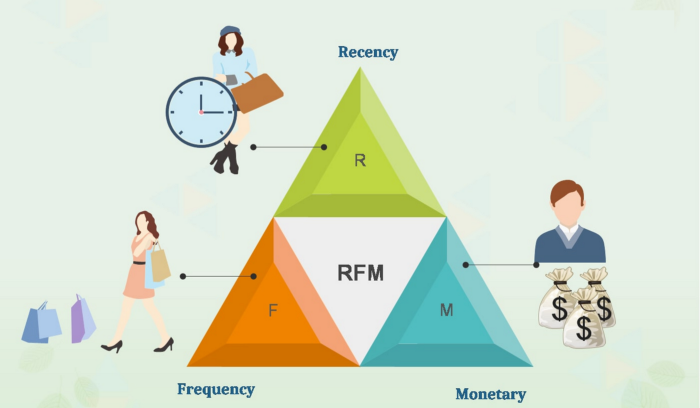

# Checklist

1.   Definição do problema
2.   Obtenção dos dados
3.   Análise exploratória dos dados
4.   Preparação dos dados
5.   Construção do modelo e avaliação



# 1. __Definição do problema__

Analisar os dados disponíveis e procurar pelos grupos de clientes mais
valiosos e menos valiosos para a companhia.

Deve ser interpretado como: um usuário que fez a última compra há 30 dias atrás; que a frequência mensal de compra dele, dentro dos últimos 120 dias foi de 5 vezes; o valor médio gasto, dentro desse período de 120 dias, foi de R$10,00.

<br>

__Objetivo__

Segmentar clientes de uma certa base em termos de:


__Recência de compra:__ há quantos dias foi feita a última compra, relativo a data atual;

__Freqûencia de compra:__ considerando uma certa janela de tempo, qual a frequência (ou quantidade) de compra;

__Valor monetário das compras:__ qual foi o total gasto, nesta mesma janela de tempo.





# 2. __Obtenção dos Dados__

Os dados foram disponibilizados pela mentorama

__Importando as bibliotecas__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.manifold import TSNE


import warnings
warnings.filterwarnings('ignore')

__Importando os dados__

In [ ]:
#função getData para carregar os dados disponíveis para este exercício.
def getData():
    return pd.read_csv("/content/sample_data/dataframe_exercicio_clusterizacao_RFM.csv")

df = getData()

__Atributos do dataset:__

    - recência: 30
    
    - frequência: 5
    
    - valor: 10

#3. __Análise exploratória dos dados__ 

In [ ]:
#Vamos verificar as dimensões do DataFrame e as linhas.
print('DIMENSÕES DO DATAFRAME:')
print('Linhas:\t\t{}'.format(df.shape[0]))
print('Colunas:\t{}'.format(df.shape[1]))


DIMENSÕES DO DATAFRAME:
Linhas:		1012
Colunas:	4


In [ ]:
#vamos ver as 5 primeiras entradas
df.head()

,user,rec,freq,valor
0,1,15.0,7.0,196.881015
1,2,51.0,6.0,162.408892
2,3,80.0,5.0,180.158644
3,4,38.0,4.0,156.048130
4,5,19.0,6.0,164.052067


Tipos das variáveis.

In [ ]:
print("\nTIPOS DAS VARIÁVEIS:")
print(df.dtypes)


TIPOS DAS VARIÁVEIS:
user       int64
rec      float64
freq     float64
valor    float64
dtype: object


Outra análise importante para se fazer é identificar a quantidade de dados ausentes por feature.


In [ ]:
print('\nVALORES AUSENTES:')
print((df.isnull().sum() / df.shape[0]).sort_values(ascending = False))


VALORES AUSENTES:
valor    0.0
freq     0.0
rec      0.0
user     0.0
dtype: float64


Acima, vemos que não há missing values.

__Distribuição estatistíca dos dados__

In [ ]:
df.describe()

,user,rec,freq,valor
count,1012.000000,1012.000000,1012.000000,1012.000000
mean,506.500000,45.064229,4.524704,109.568915
std,292.283538,26.471133,2.423586,125.013542
min,1.000000,1.000000,1.000000,10.859150
25%,253.750000,23.000000,2.000000,57.097928
50%,506.500000,45.000000,5.000000,103.561817
75%,759.250000,68.000000,7.000000,152.704398
max,1012.000000,118.000000,17.000000,3241.824119


Acima, podemos ver que precisamos normalizar os dados, faremos isso mais pra frente. 

# 4. __Preparação dos dados__

Agora dividimos as métricas em segmentos usando quantis. Iremos atribuir uma pontuação de 1 a 4 para cada __Recência de compra__, __Freqûencia de compra__ e __Valor monetário das compras:__, respectivamente. 1 é o valor mais alto e 4 é o valor mais baixo. Uma pontuação RFM final (valor geral) é calculada simplesmente combinando números de pontuação RFM individuais.

In [ ]:
quantiles = df.quantile (q = [0.25,0.50,0.75]) 
quantiles = quantiles.to_dict ()

In [ ]:
segmentada_rfm = df.copy()

In [ ]:
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [ ]:
segmentada_rfm['R_quartile'] = segmentada_rfm['rec'].apply(RScore, args=('rec',quantiles))
segmentada_rfm['F_quartile'] = segmentada_rfm['freq'].apply(FMScore, args=('freq',quantiles))
segmentada_rfm['V_quartile'] = segmentada_rfm['valor'].apply(FMScore, args=('valor',quantiles))
segmentada_rfm.head()

,user,rec,freq,valor,R_quartile,F_quartile,V_quartile
0,1,15.0,7.0,196.881015,1,2,1
1,2,51.0,6.0,162.408892,3,2,1
2,3,80.0,5.0,180.158644,4,3,1
3,4,38.0,4.0,156.048130,2,3,1
4,5,19.0,6.0,164.052067,1,2,1


Calculando a pontuação total RFM combinada

RFM_Score = R_quartile + F_quartile + M_quartile

In [ ]:
segmentada_rfm['RFM_Segmentada'] = segmentada_rfm.R_quartile.map(str)+segmentada_rfm.F_quartile.map(str)+segmentada_rfm.V_quartile.map(str)

In [ ]:
segmentada_rfm.head()


,user,rec,freq,valor,R_quartile,F_quartile,V_quartile,RFM_Segmentada
0,1,15.0,7.0,196.881015,1,2,1,121
1,2,51.0,6.0,162.408892,3,2,1,321
2,3,80.0,5.0,180.158644,4,3,1,431
3,4,38.0,4.0,156.048130,2,3,1,231
4,5,19.0,6.0,164.052067,1,2,1,121


Para terminar, precisamos apenas concatenar as três colunas de pontuação.

In [ ]:
segmentada_rfm['RFM_Score'] = segmentada_rfm[['R_quartile','F_quartile','V_quartile']].sum(axis=1)

In [ ]:
segmentada_rfm.head()

,user,rec,freq,valor,R_quartile,F_quartile,V_quartile,RFM_Segmentada,RFM_Score
0,1,15.0,7.0,196.881015,1,2,1,121,4
1,2,51.0,6.0,162.408892,3,2,1,321,6
2,3,80.0,5.0,180.158644,4,3,1,431,8
3,4,38.0,4.0,156.048130,2,3,1,231,6
4,5,19.0,6.0,164.052067,1,2,1,121,4


In [ ]:
print("Melhores clientes: ",len(segmentada_rfm[segmentada_rfm['RFM_Segmentada']=='121']))
print('Clientes fieis: ',len(segmentada_rfm[segmentada_rfm['F_quartile']==2]))
print("Grandes gastadores: ",len(segmentada_rfm[segmentada_rfm['V_quartile']==1]))
print('Quase perdida: ', len(segmentada_rfm[segmentada_rfm['RFM_Segmentada']=='134']))
print('Clientes perdidos: ',len(segmentada_rfm[segmentada_rfm['RFM_Segmentada']=='344']))

Melhores clientes:  9
Clientes fieis:  247
Grandes gastadores:  253
Quase perdida:  23
Clientes perdidos:  17


Podemos visualizar melhor os valores acima e obter mais granularidade para tomar decisões sobre retenção ou retenção de clientes. Mas, isso estaria fora do escopo

In [ ]:
segmentada_rfm['RFM_Score'].unique()

array([ 4,  6,  8, 11,  9,  7,  5, 10,  3, 12])

In [ ]:
segmentada_rfm.groupby('RFM_Score').agg({
    'rec': 'mean',
    'freq': 'mean',
    'valor': ['mean', 'count'] }).round(1)

rec  freq  valor      
           mean  mean   mean count
RFM_Score                         
3           7.2  10.2  216.9    16
4          21.4   7.5  163.3    24
5          22.2   6.3  149.9    61
6          28.1   5.5  130.3   141
7          36.6   4.6  119.0   203
8          47.9   4.5  100.4   220
9          56.3   3.6  109.3   191
10         67.7   3.4   68.2    92
11         72.3   2.7   40.9    50
12         79.7   1.6   39.2    14

K-means usa a distância euclidiana como uma métrica de distância para calcular a distância entre cada ponto e o centróide.

<br>

__K-means fornece o melhor resultado nas seguintes condições:__



*   A distribuição de dados não é distorcida
*   Os dados são padronizados (ou seja, média de 0 e desvio padrão de 1).



In [ ]:
df_rfm = np.log(df)

In [ ]:
sc = StandardScaler()
df_rfm_sc = sc.fit_transform(df_rfm)

In [ ]:
df_rfm_sc = pd.DataFrame(df_rfm_sc, columns= df_rfm.columns)
df_rfm_sc.head()

,user,rec,freq,valor
0,-6.013593,-0.795649,0.925277,1.141927
1,-5.309964,0.444823,0.697848,0.875020
2,-4.898367,0.901166,0.428857,1.018845
3,-4.606335,0.146569,0.099638,0.819620
4,-4.379817,-0.556035,0.697848,0.888979


__Encontrando o número ideal de clusters!__

Um número diferente de clusters pode nos levar a resultados completamente diferentes. Portanto, é importante obter o número ideal de clusters para nossa análise. Para descobrir isso, vamos aplicar o método do cotovelo . O método do cotovelo simplesmente informa o número ideal do cluster para a inércia ideal.

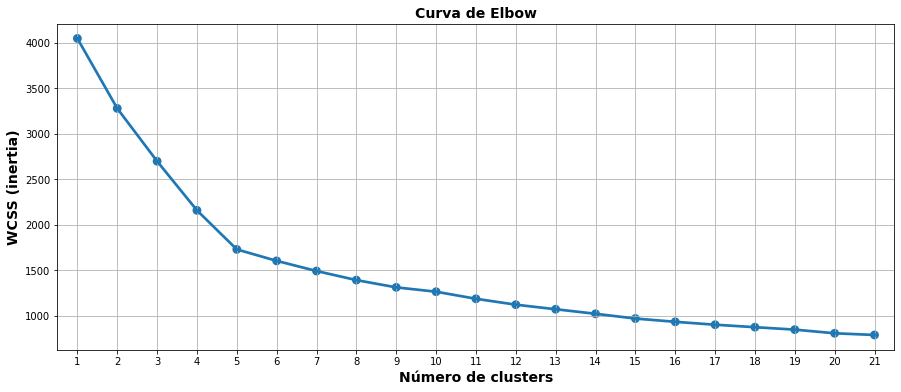

In [ ]:
l = []
for k in range(0, 21):
    kmeans = KMeans(n_clusters=k+1, random_state=1231).fit(df_rfm_sc)
    l.append(kmeans.inertia_)

plt.figure(figsize=[15,6])
plt.title('Curva de Elbow', fontsize = 14, fontweight = 'bold')
plt.xlabel('Número de clusters', fontsize = 14, fontweight = 'bold')
plt.ylabel('WCSS (inertia)', fontsize = 14, fontweight = 'bold')
sns.pointplot(x=list(range(1,22)), y=l)
plt.grid()
plt.show()

Aqui, parece que 4 é o ideal. Com base nos requisitos de negócios, podemos prosseguir com menos ou mais clusters. Estaremos tentando nossa análise com,3, 4 e 5 clusters.

In [ ]:
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)

    # Extraindo rótulos de cluster
    cluster_labels = kmeans.labels_
        
  
    # Criando uma coluna de rótulo de cluster no conjunto de dados original
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Inicializando o TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    plt.title('Gráfico Achatado de {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1")
    
    return df_new

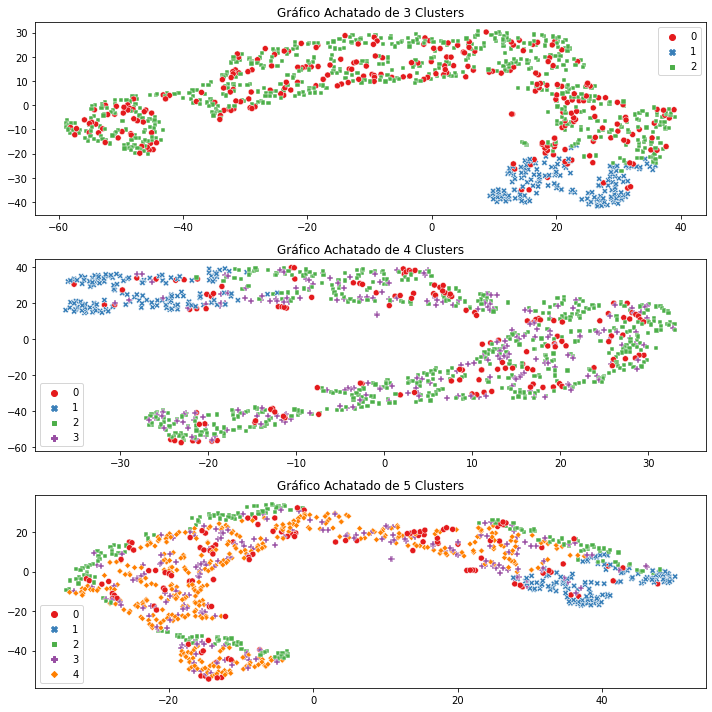

In [ ]:
plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
df_rfm_k3 = kmeans(df_rfm_sc, 3, df)

plt.subplot(3, 1, 2)
df_rfm_k4 = kmeans(df_rfm_sc, 4, df)

plt.subplot(3, 1, 3)
df_rfm_k5 = kmeans(df_rfm_sc, 5, df)

plt.tight_layout()

A imagem é obtida achatando o gráficos tridimensionais (criados a partir de Recency, Frequency e MonetaryValue) em gráficos bidimensionais para facilitar a visualização.

In [ ]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):

    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                       index=df.index, 
                                       columns=df.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']

    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                        id_vars=['user', 'Cluster'],
                        value_vars=['rec', 'freq', 'valor'], 
                        var_name='Metric', 
                        value_name='Value')

    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

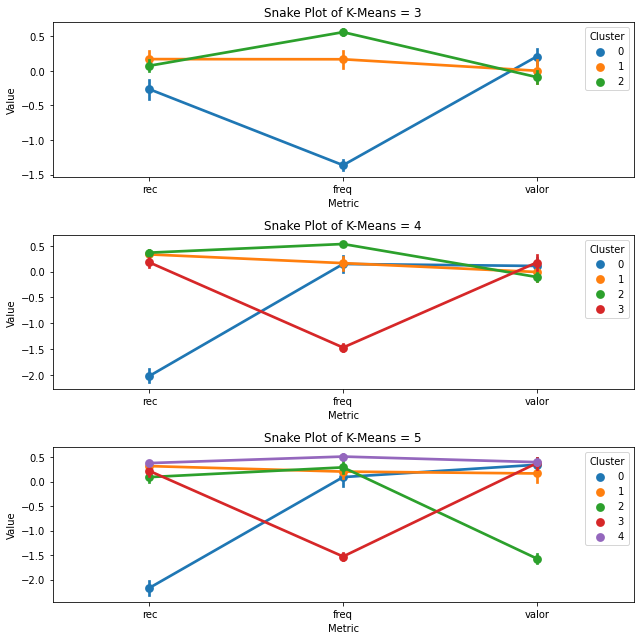

In [ ]:
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
plt.title('Snake Plot of K-Means = 3')
snake_plot(df_rfm_sc, df_rfm_k3, df)

plt.subplot(3, 1, 2)
plt.title('Snake Plot of K-Means = 4')
snake_plot(df_rfm_sc, df_rfm_k4, df)

plt.subplot(3, 1, 3)
plt.title('Snake Plot of K-Means = 5')
snake_plot(df_rfm_sc, df_rfm_k5, df)

plt.tight_layout()

A partir dos gráficos achatados e dos gráficos de cobra, é evidente que ter um valor de cluster de 4 segmenta bem nossos clientes. Também poderíamos ir para um número maior de clusters, depende totalmente de como a empresa deseja segmentar seus clientes.

Resumindo minhas descobertas (clusters)
Interpretação dos clusters formados usando k-means.

In [ ]:
def rfm_values(df):

    df_new = df.groupby(['Cluster']).agg({
        'rec': 'mean',
        'freq': 'mean',
        'valor': ['mean', 'count']
    }).round(0)
    
    return df_new

In [ ]:
rfm_values(df_rfm_k4)

rec freq  valor      
         mean mean   mean count
Cluster                        
0         6.0  5.0  114.0   137
1        52.0  5.0  108.0   142
2        53.0  6.0   98.0   515
3        47.0  1.0  135.0   218

__O que cada cluster representa?__
<br>

* O primeiro cluster pertence ao segmento “Melhores clientes” que vimos 
  anteriormente, pois eles compram recentemente (R = 1), compradores         frequentes (F = 2) e gastam bem (M = 1).


*   Os clientes no segundo cluster podem ser interpretados como clientes passageiros, já que sua última compra foi há muito tempo (R = 4), compram bem (F = 3) e gastou pouco (M = 4). 

*   O terceiro cluster está mais relacionado ao segmento “Quase Perdido”, já que não compram há algum tempo (R = 3), mas costumavam comprar com frequência e gastam pouco.  A empresa precisa desenvolver novas estratégias para torná-los membros permanentes.

* O último cluster é de clientes muito fiéis e eles também gastaram muito.